### Forced Van der Pol Oscilator

$$
    \frac{\mathrm{d}^2}{\mathrm{d}t^2}f(t) - \mu(1-f^2(t))\frac{\mathrm{d}}{\mathrm{d}t}f(t) + f(t) = u(t)
$$

$$ 
\frac{\mathrm{d}^2}{\mathrm{d}t^2}f(t) = \mu(1-f^2(t))\frac{\mathrm{d}}{\mathrm{d}t}f(t) - f(t) + u(t)
$$

#### Companion Form

$\mathbf{f}(t) = [f(t)\ \mathrm{d}f/\mathrm{d}t]^\text{T}$

$$
    \frac{\mathrm{d}}{\mathrm{d}t}\mathbf{f}(t) = \begin{bmatrix}\mathbf{f}_1 \\ -\mathbf{f}_1 + \mu(1-\mathbf{f}_1^2)\mathbf{f}_2\end{bmatrix} + \begin{bmatrix}0\\1\end{bmatrix}u(t)
$$

In [1]:
function increment_rk4!(x, f::Function, Δx::AbstractFloat, θ::Union{Missing, Dict} = missing)
    f_ = ismissing(θ) ? f : x -> f(x,θ);
    
    k₁ = Δx * f_(x);
    k₂ = Δx * f_(x .+ 0.5k₁);
    k₃ = Δx * f_(x .+ 0.5k₂);
    k₄ = Δx * f_(x .+ k₃);
    
    x .+= (k₁ .+ 2k₂ .+ 2k₃ .+ k₄)./6.;
end

function solve_rk4(x₀, tₛ, f::Function, θ::Union{Missing, Dict} = missing)
    # Solve for discrete mesh tₛ
    xₛ = zeros(size(x₀,1),length(tₛ));
    xᵢ, xₛ[:,1] = x₀, copy(x₀)
    for i ∈ 2:length(tₛ)
        increment_rk4!(xᵢ, f, tₛ[i]-tₛ[i-1], θ)
        xₛ[:,i] = copy(xᵢ)
    end
    return xₛ
end

solve_rk4 (generic function with 2 methods)

In [2]:
x₀ = [71.;79.];
θ  = Dict(:α => 0.5, :β => 0.0025, :γ => 0.3)

f = (x,θ) -> [θ[:α]*x[1] - θ[:β]*x[1]*x[2];θ[:β]*x[1]*x[2] - θ[:γ]*x[2]];

tₛ = collect(0:0.1:40);
xₛ = solve_rk4(x₀, tₛ, f, θ);

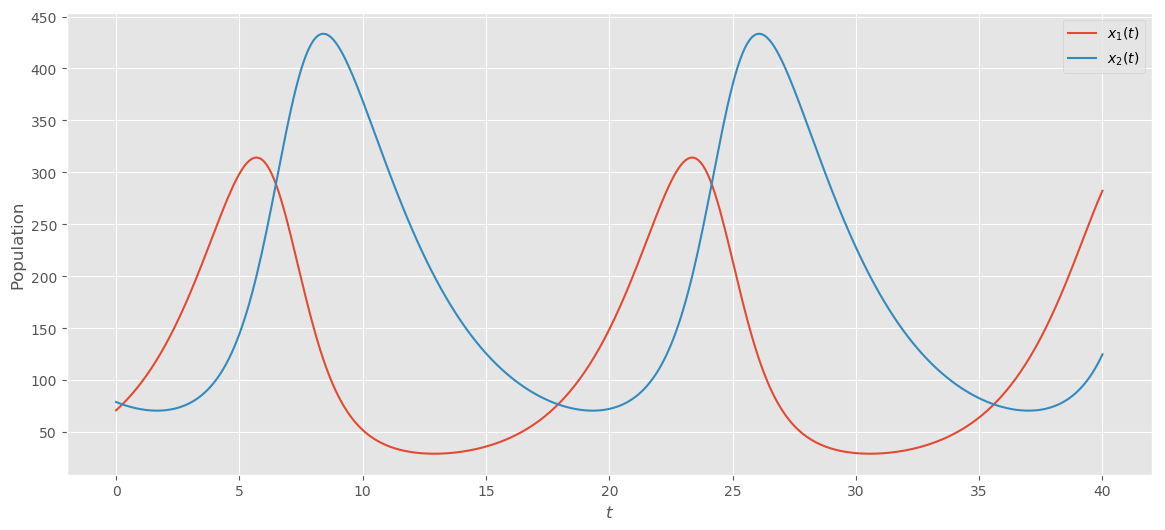

In [7]:
using PyPlot
plt["style"]["use"]("ggplot")

figure(figsize=(14,6))
plot(tₛ,xₛ[1,:],"-",tₛ,xₛ[2,:],"-")
xlabel(L"$t$"); ylabel("Population"); legend([L"$x_1(t)$",L"$x_2(t)$"]);

In [119]:
f = (x,θ) -> [x[2]; -x[1] + θ[:μ]*(1 - x[1]*x[1])*x[2]]
θ = Dict(:μ => 5.);
x₀ = [2.; -0.1];

tₛ = collect(0:0.1:50);
xₛ = solve_rk4(x₀, tₛ, f, θ);

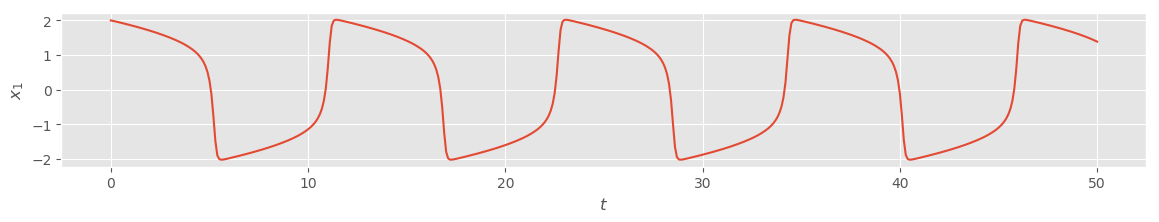

In [120]:
figure(figsize=(14,2))
plot(tₛ,xₛ[1,:],"-")
xlabel(L"$t$"); ylabel(L"$x_1$");

In [129]:
function increment_rk4!(x, t::AbstractFloat, f::Function, Δt::AbstractFloat, θ::Union{Missing, Dict} = missing)
    f_ = ismissing(θ) ? f : (x,t) -> f(x,t,θ);
    
    k₁ = Δt * f_(x, t);
    k₂ = Δt * f_(x .+ 0.5k₁, t + 0.5Δt);
    k₃ = Δt * f_(x .+ 0.5k₂, t + 0.5Δt);
    k₄ = Δt * f_(x .+ k₃, t + Δt);
    
    x .+= (k₁ .+ 2k₂ .+ 2k₃ .+ k₄)./6.;
end

function solve_rk4_td(x₀, tₛ, f::Function, θ::Union{Missing, Dict} = missing)
    # Solve for discrete mesh tₛ
    xₛ = zeros(size(x₀,1),length(tₛ));
    xᵢ, xₛ[:,1] = x₀, copy(x₀)
    for i ∈ 2:length(tₛ)
        increment_rk4!(xᵢ, tₛ[i-1], f, tₛ[i]-tₛ[i-1], θ)
        xₛ[:,i] = copy(xᵢ)
    end
    return xₛ
end

solve_rk4_td (generic function with 2 methods)

In [246]:
f = (x,t,θ) -> [x[2]; -x[1] + θ[:μ]*(1 - x[1]*x[1])*x[2] + θ[:A]*sin(θ[:ω]*t)]

x₀ = [2.; 0.];

tₛ = collect(0:0.1:50);

x₀ = [2.; 0.];
θ = Dict(:μ => 5., :A => 5., :ω => 2π/10.);
xa = solve_rk4_td(x₀, tₛ, f, θ);

θ = Dict(:μ => 5., :A => 0., :ω => 2π/10.);
xb = solve_rk4_td(x₀, tₛ, f, θ);

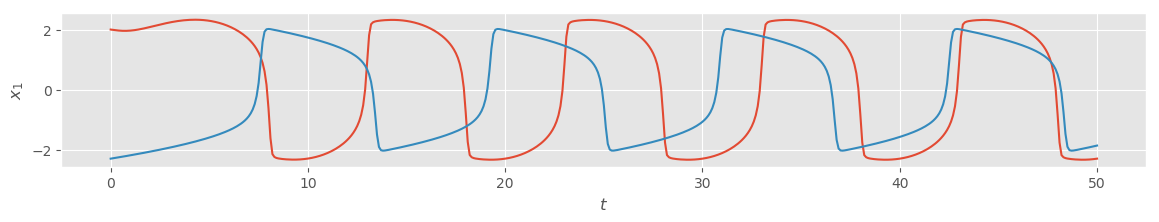

In [247]:
figure(figsize=(14,2))
plot(tₛ,xa[1,:],"-", tₛ, xb[1,:])
xlabel(L"$t$"); ylabel(L"$x_1$");